# **Project name- Playstore Data Analysis**

## **INDUSTRIAL USE OF OUR PROJECT**

Analyzing data from the Google Play Store can have several industrial applications,

especially for businesses in the mobile app and software development industry. 

Here are some ways in which the Play Store data analysis can be useful:

1.**Market Research :** Businesses can use Play Store data to conduct market research. They can analyze user reviews, ratings, and download statistics to understand user preferences, identify trends, and discover gaps in the market. This information can guide product development and marketing strategies.

2.**Competitor Analysis :** Companies can use Play Store data to analyze their competitors' apps. 

3.**App Performance Monitoring :** Developers can monitor their own app's performance on the Play Store. They can track user ratings and reviews to identify issues or bugs and address them promptly.

4.**Pricing Strategy :** By examining how price changes affect download rates and revenue, businesses can optimize their pricing strategies for maximum profitability.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import statistics
from statsmodels.stats import weightstats
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.oneway as oneway
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Playstore_final.csv",low_memory=False)

In [3]:
pd.options.display.max_columns=27

**Cleaning The Data**

In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last update', 'Privacy Policy',
       'Content Rating', 'Ad Supported', 'In app purchases', 'Editor Choice',
       'Summary', 'Reviews', 'Android version Text', 'Developer',
       'Developer Address', 'Developer Internal ID', 'Version'],
      dtype='object')

In [5]:
col=[]
for i in df.columns:
    j=i.replace(" ","_")
    col.append(j)
df.columns=col
df.columns

Index(['App_Name', 'App_Id', 'Category', 'Rating', 'Rating_Count', 'Installs',
       'Minimum_Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum_Android', 'Developer_Id', 'Developer_Website',
       'Developer_Email', 'Released', 'Last_update', 'Privacy_Policy',
       'Content_Rating', 'Ad_Supported', 'In_app_purchases', 'Editor_Choice',
       'Summary', 'Reviews', 'Android_version_Text', 'Developer',
       'Developer_Address', 'Developer_Internal_ID', 'Version'],
      dtype='object')

In [6]:
columns=['App_Name', 'App_Id', 'Category', 'Rating', 'Rating_Count', 'Minimum_Installs',
                'Free', 'Price', 'Currency', 'Released','Last_update', 'Content_Rating', 
                'In_app_purchases', 'Editor_Choice', 'Reviews', 'Developer']

df = df[columns]

In [7]:
df.columns

Index(['App_Name', 'App_Id', 'Category', 'Rating', 'Rating_Count',
       'Minimum_Installs', 'Free', 'Price', 'Currency', 'Released',
       'Last_update', 'Content_Rating', 'In_app_purchases', 'Editor_Choice',
       'Reviews', 'Developer'],
      dtype='object')

In [8]:
df

,App_Name,App_Id,Category,Rating,Rating_Count,Minimum_Installs,Free,Price,Currency,Released,Last_update,Content_Rating,In_app_purchases,Editor_Choice,Reviews,Developer
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000.0,True,0.0,USD,7/19/2017,7/19/2017,Everyone,False,False,28.0,eniseistudio
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,1000.0,True,0.0,USD,5/5/2017,5/5/2017,Everyone,False,False,3.0,eniseistudio
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000.0,True,0.0,USD,7/18/2017,7/18/2017,Everyone,False,False,3.0,eniseistudio
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,5000.0,True,0.0,USD,6/24/2017,6/24/2017,Everyone,False,False,7.0,eniseistudio
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000.0,True,0.0,USD,6/13/2017,10/6/2017,Everyone,False,False,29.0,eniseistudio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450790,Punjabi Keyboard,com.fancy.fontforu.punjabikeyboard,Productivity,4.240000,875.0,100000.0,True,0.0,USD,7/15/2015,6/26/2020,Everyone,False,False,257.0,Fancy Font For U
450791,Live 4D Wallpaper 2020 : 4K Live Backgrounds,com.fancy.hdwallpaper.parallaxbackgroundhd,Personalization,2.961539,52.0,10000.0,True,0.0,USD,9/13/2020,9/13/2020,Everyone,False,False,26.0,Fancy Font For U
450792,Rap Music Maker : Rap Beats Music Recording St...,com.fancy.rapmusicmakerstudio,Music & Audio,3.500000,64.0,10000.0,True,0.0,USD,8/7/2020,4/22/2021,Everyone,False,False,41.0,Fancy Font For U
450793,Meetz - Cloud Meetings and Classes,org.ssz.meet,Communication,NaN,NaN,5000.0,True,0.0,USD,NaN,7/28/2020,Everyone,False,False,NaN,INVENTRIX


In [9]:
df.duplicated().sum()

24388

In [10]:
df =df.sort_values(['App_Id', 'Rating_Count']).drop_duplicates('App_Id', keep = 'last')

In [11]:
#df =df.drop_duplicates('App_Id')

In [12]:
df.duplicated().sum()

0

In [13]:
df["Currency"].value_counts()

USD    400208
XXX     21867
EUR       101
INR        43
GBP        32
PKR        30
THB        27
HKD        22
TRY        21
RUB        21
VND        16
BGN        14
BDT        14
KRW        13
UAH        12
CAD        12
IDR        12
AUD        10
SGD         9
JPY         8
RSD         7
ZAR         6
ILS         5
PLN         5
PEN         5
CHF         5
DKK         4
BRL         4
AED         4
NGN         3
CZK         3
KES         3
EGP         2
MYR         2
SEK         2
TWD         2
MXN         2
NZD         2
LBP         1
KZT         1
TZS         1
COP         1
GHS         1
HUF         1
LKR         1
DZD         1
BOB         1
Name: Currency, dtype: int64

In [14]:
#Removing Outliers in data
df.drop(df[~df['Currency'].isin(['USD','EUR','INR','GBP'])].index, inplace = True)

In [15]:
df["Currency"].value_counts()

USD    400208
EUR       101
INR        43
GBP        32
Name: Currency, dtype: int64

In [16]:
df.isnull().sum()

App_Name                0
App_Id                  0
Category                0
Rating               2044
Rating_Count        98216
Minimum_Installs        0
Free                    0
Price                   0
Currency                0
Released             2622
Last_update             0
Content_Rating          0
In_app_purchases        0
Editor_Choice           0
Reviews              2044
Developer               3
dtype: int64

In [17]:
df.drop(df[(df['Rating'].isna()) | (df['Rating']==0.0)].index, inplace = True)
df.drop(df[df['Released'].isna()].index, inplace = True)
#df.dropna(subset = ['Released'], inplace = True)

In [18]:
df.isnull().sum()

App_Name            0
App_Id              0
Category            0
Rating              0
Rating_Count        0
Minimum_Installs    0
Free                0
Price               0
Currency            0
Released            0
Last_update         0
Content_Rating      0
In_app_purchases    0
Editor_Choice       0
Reviews             0
Developer           2
dtype: int64

In [19]:
df.shape

(301578, 16)

In [20]:
#df['Developer'].fillna(df['Developer'].mode()[0], inplace=True)

In [21]:
df.dtypes

App_Name             object
App_Id               object
Category             object
Rating              float64
Rating_Count        float64
Minimum_Installs    float64
Free                 object
Price               float64
Currency             object
Released             object
Last_update          object
Content_Rating       object
In_app_purchases       bool
Editor_Choice          bool
Reviews             float64
Developer            object
dtype: object

In [22]:
df["Released"]=pd.to_datetime(df["Released"],errors="coerce")
df["Last_update"]=pd.to_datetime(df["Last_update"],errors='coerce')
df['Rating_Count'] = df['Rating_Count'].astype(int)
#df['Rating'] = df['Rating'].apply(lambda x: round(x,2))

In [23]:
df.isnull().sum()

App_Name            0
App_Id              0
Category            0
Rating              0
Rating_Count        0
Minimum_Installs    0
Free                0
Price               0
Currency            0
Released            0
Last_update         0
Content_Rating      0
In_app_purchases    0
Editor_Choice       0
Reviews             0
Developer           2
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301578 entries, 263103 to 231898
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   App_Name          301578 non-null  object        
 1   App_Id            301578 non-null  object        
 2   Category          301578 non-null  object        
 3   Rating            301578 non-null  float64       
 4   Rating_Count      301578 non-null  int32         
 5   Minimum_Installs  301578 non-null  float64       
 6   Free              301578 non-null  object        
 7   Price             301578 non-null  float64       
 8   Currency          301578 non-null  object        
 9   Released          301578 non-null  datetime64[ns]
 10  Last_update       301578 non-null  datetime64[ns]
 11  Content_Rating    301578 non-null  object        
 12  In_app_purchases  301578 non-null  bool          
 13  Editor_Choice     301578 non-null  bool          
 14 

**Summary Of The Data**

In [25]:
df.describe(include="all",datetime_is_numeric=True )

,App_Name,App_Id,Category,Rating,Rating_Count,Minimum_Installs,Free,Price,Currency,Released,Last_update,Content_Rating,In_app_purchases,Editor_Choice,Reviews,Developer
count,301578,301578,301578,301578.000000,3.015780e+05,3.015780e+05,301578,301578.000000,301578,301578,301578,301578,301578,301578,3.015780e+05,301576
unique,290971,301578,48,NaN,NaN,NaN,2,NaN,4,NaN,NaN,6,2,2,NaN,63347
top,Solitaire,AutomateIt.mainPackage,Education,NaN,NaN,NaN,True,NaN,USD,NaN,NaN,Everyone,False,False,NaN,Amino Apps
freq,70,1,29718,NaN,NaN,NaN,284267,NaN,301449,NaN,NaN,254565,223962,300880,NaN,265
mean,NaN,NaN,NaN,4.077717,1.823757e+04,1.120639e+06,NaN,0.258643,NaN,2017-07-01 23:11:50.144639232,2020-01-02 02:29:19.783538688,NaN,NaN,NaN,6.584365e+03,NaN
min,NaN,NaN,NaN,1.000000,3.000000e+00,0.000000e+00,NaN,0.000000,NaN,2010-01-28 00:00:00,2009-11-05 00:00:00,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,3.799513,2.600000e+01,1.000000e+03,NaN,0.000000,NaN,2015-12-03 00:00:00,2019-06-12 00:00:00,NaN,NaN,NaN,1.100000e+01,NaN
50%,NaN,NaN,NaN,4.200000,1.320000e+02,1.000000e+04,NaN,0.000000,NaN,2017-12-12 00:00:00,2020-08-12 00:00:00,NaN,NaN,NaN,5.700000e+01,NaN
75%,NaN,NaN,NaN,4.500000,1.071000e+03,1.000000e+05,NaN,0.000000,NaN,2019-07-04 00:00:00,2021-03-22 00:00:00,NaN,NaN,NaN,4.230000e+02,NaN
max,NaN,NaN,NaN,5.000000,1.386210e+08,1.000000e+10,NaN,399.990000,NaN,2021-06-09 00:00:00,2021-06-17 00:00:00,NaN,NaN,NaN,5.237720e+07,NaN


Average mean of the rating is 4.018803,min rating is 0 and maximum rating of apps is 5

25% apps are having zero rating, 50% apps are having rating less then 3.93 and 75% apps having rating less than 4.3
 
mean rating of all the apps is 3.018803

mean installation count is 883648 ,Maximum installation count of the app is 10000000000

sum of all price off apps = 450703

average price of paid apps is 0.315508,min price is 0 and max price is 400

75 % apps are  free of cost

Total 447983 reviews are there for all apps

Solitaire app is the trending app with max installation and is free app

**When we dug our data we came across minor details of our data**

Category wise app count

In [26]:
category_wise=df.groupby("Category")
category_wise["App_Name"].count()

Category
Action                      5262
Adventure                   4268
Arcade                      5841
Art & Design                2133
Auto & Vehicles             1748
Beauty                       836
Board                       2493
Books & Reference          19998
Business                    8346
Card                        2453
Casino                      1115
Casual                      7887
Comics                       559
Communication               4836
Dating                       895
Education                  29718
Educational                 4671
Entertainment              14516
Events                       392
Finance                     6834
Food & Drink                3655
Health & Fitness            8754
House & Home                1118
Libraries & Demo             816
Lifestyle                  12372
Maps & Navigation           3335
Medical                     3273
Music                        700
Music & Audio              17184
News & Magazines            5522
P

**no of free and paid apps**

In [27]:
total_apps = len(df)
free_apps_count = len(df[df['Free'] == True])
percentage_free_apps = (free_apps_count / total_apps) * 100
print("Percentage of free apps:", percentage_free_apps)
total_apps = len(df)
paid_apps_count = len(df[df['Free'] == False])
percentage_paid_apps = (paid_apps_count / total_apps) * 100
print("Percentage of Paid apps:", percentage_paid_apps)

Percentage of free apps: 94.25985980409712
Percentage of Paid apps: 5.740140195902884


In [28]:
free_apps_count = df[df['Free']==True].shape[0]
print("Number of free apps:", free_apps_count)
Paid_apps_count = df[df['Free']==False].shape[0]
print("Number of Paid apps:", Paid_apps_count)

Number of free apps: 284267
Number of Paid apps: 17311


**which app has maximum installs**

In [29]:
grouped_data = df.groupby('App_Name')['Minimum_Installs'].sum().reset_index()
max_installs_category = grouped_data.loc[grouped_data['Minimum_Installs'].idxmax(), 'App_Name']
max_installs_value = grouped_data['Minimum_Installs'].max()
print("App with the maximum installs:", max_installs_category)
print("Maximum installs:", max_installs_value)


App with the maximum installs: Google Play services
Maximum installs: 10000000000.0


**app released per year**

In [30]:
release_dates = df["Released"]
data_years = df[(release_dates.dt.year >= 2015) & (release_dates.dt.year <= 2020)]
app_releases_per_year = data_years["Released"].dt.year.value_counts().sort_index()
for year, count in app_releases_per_year.items():
    print(f"Year: {year}, Number of App Releases: {count}")


Year: 2015, Number of App Releases: 26007
Year: 2016, Number of App Releases: 32742
Year: 2017, Number of App Releases: 42456
Year: 2018, Number of App Releases: 46898
Year: 2019, Number of App Releases: 53442
Year: 2020, Number of App Releases: 47587


**Category wise reviews and ratings**

In [31]:
grouped_by=df.groupby("Category")
data_frame=grouped_by[["Rating","Rating_Count","Reviews"]].sum()
data_frame

,Rating,Rating_Count,Reviews
Category,,,
Action,20832.527199,538169345,242837206.0
Adventure,17363.611546,116751484,51379769.0
Arcade,23795.599851,251368079,90597208.0
Art & Design,8453.193751,14104305,5727416.0
Auto & Vehicles,6710.217096,7661529,2482328.0
Beauty,3332.030095,3385282,1215117.0
Board,10174.873075,53972824,18585378.0
Books & Reference,87244.672973,50761226,18002795.0
Business,32707.947404,44238884,14646363.0


**Plotting Graphs on Data For Visualisation**

In [32]:
cat_apps=df.groupby(by="Category")["App_Name"].count()
print(cat_apps.index)
print(cat_apps.values)
cat_apps.nunique()

Index(['Action', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles',
       'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino',
       'Casual', 'Comics', 'Communication', 'Dating', 'Education',
       'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Maps & Navigation', 'Medical', 'Music', 'Music & Audio',
       'News & Magazines', 'Parenting', 'Personalization', 'Photography',
       'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping',
       'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local',
       'Trivia', 'Video Players & Editors', 'Weather', 'Word'],
      dtype='object', name='Category')
[ 5262  4268  5841  2133  1748   836  2493 19998  8346  2453  1115  7887
   559  4836   895 29718  4671 14516   392  6834  3655  8754  1118   816
 12372  3335  3273   700 17184  5522   690 20987  7281  9461 10230  2847
  3830  4462  734

48

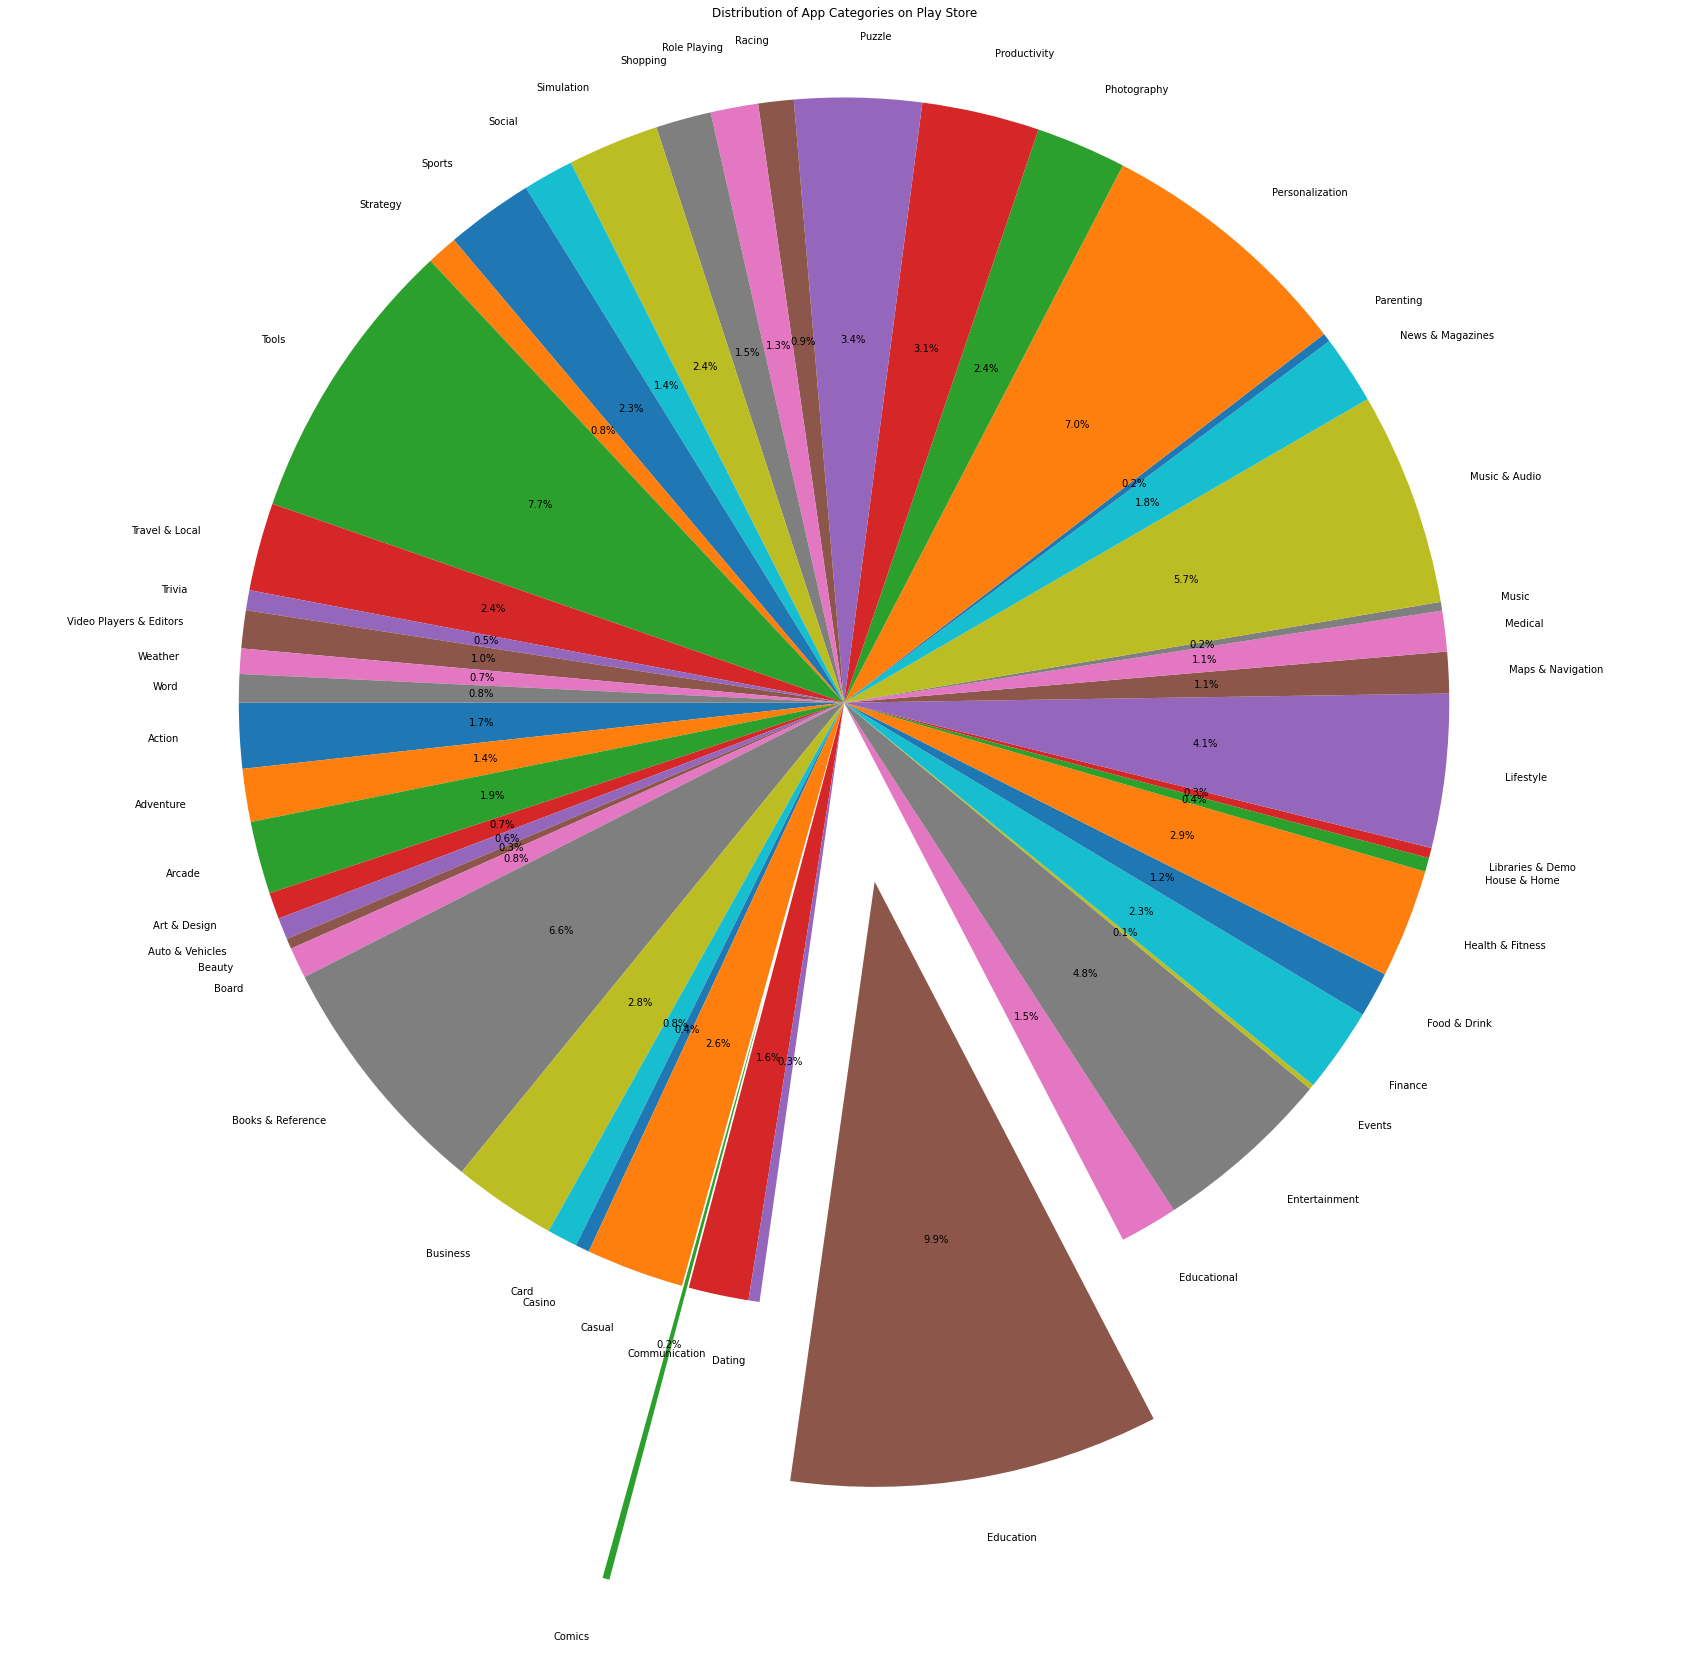

In [33]:
app_categories = cat_apps.index
percentages = cat_apps.values
# Creating the pie chart
plt.figure(figsize=(30,30))
plt.pie(percentages, labels=app_categories, autopct='%1.1f%%', startangle=180
       ,explode=(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.3,
                 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
                 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
                ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0))
plt.axis('equal') 
#plt.xticks(rotation=75)
plt.title('Distribution of App Categories on Play Store')
plt.show()

***Inference :***

The size of each slice in the pie chart represents the proportion of apps in a specific category relative to the total number of apps in all categories combined.According to graph we get that **Education is Maximum Category** and **Comics is Minimum Category**

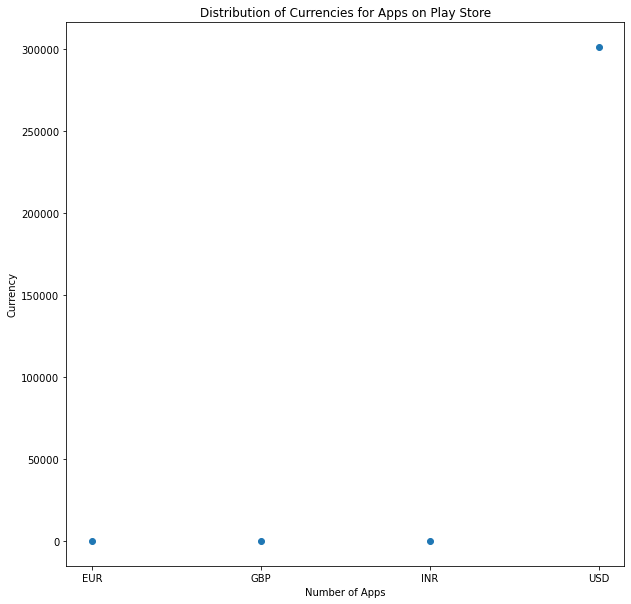

In [34]:
app_count=df.groupby("Currency")
curr=app_count["App_Name"].count()
currencies=curr.index.astype(str)
counts=curr.values

app_categories = currencies
percentages = counts
# Creating the pie chart
plt.figure(figsize=(10,10))
plt.scatter(app_categories,percentages)#, labels=app_categories, startangle=180)
plt.xlabel('Number of Apps')
plt.ylabel('Currency')
plt.title('Distribution of Currencies for Apps on Play Store')

plt.show()


***Inference :*** 

From above graph we get **Currency Distribution** i.e. Which currencies are most common among apps on playstore. The longer the bar for a currency, the more apps use that currency.

we also get information about **Popular Currencies** which helps us to identify the most popular or widely accepted currencies within the app ecosystem on the Play Store.

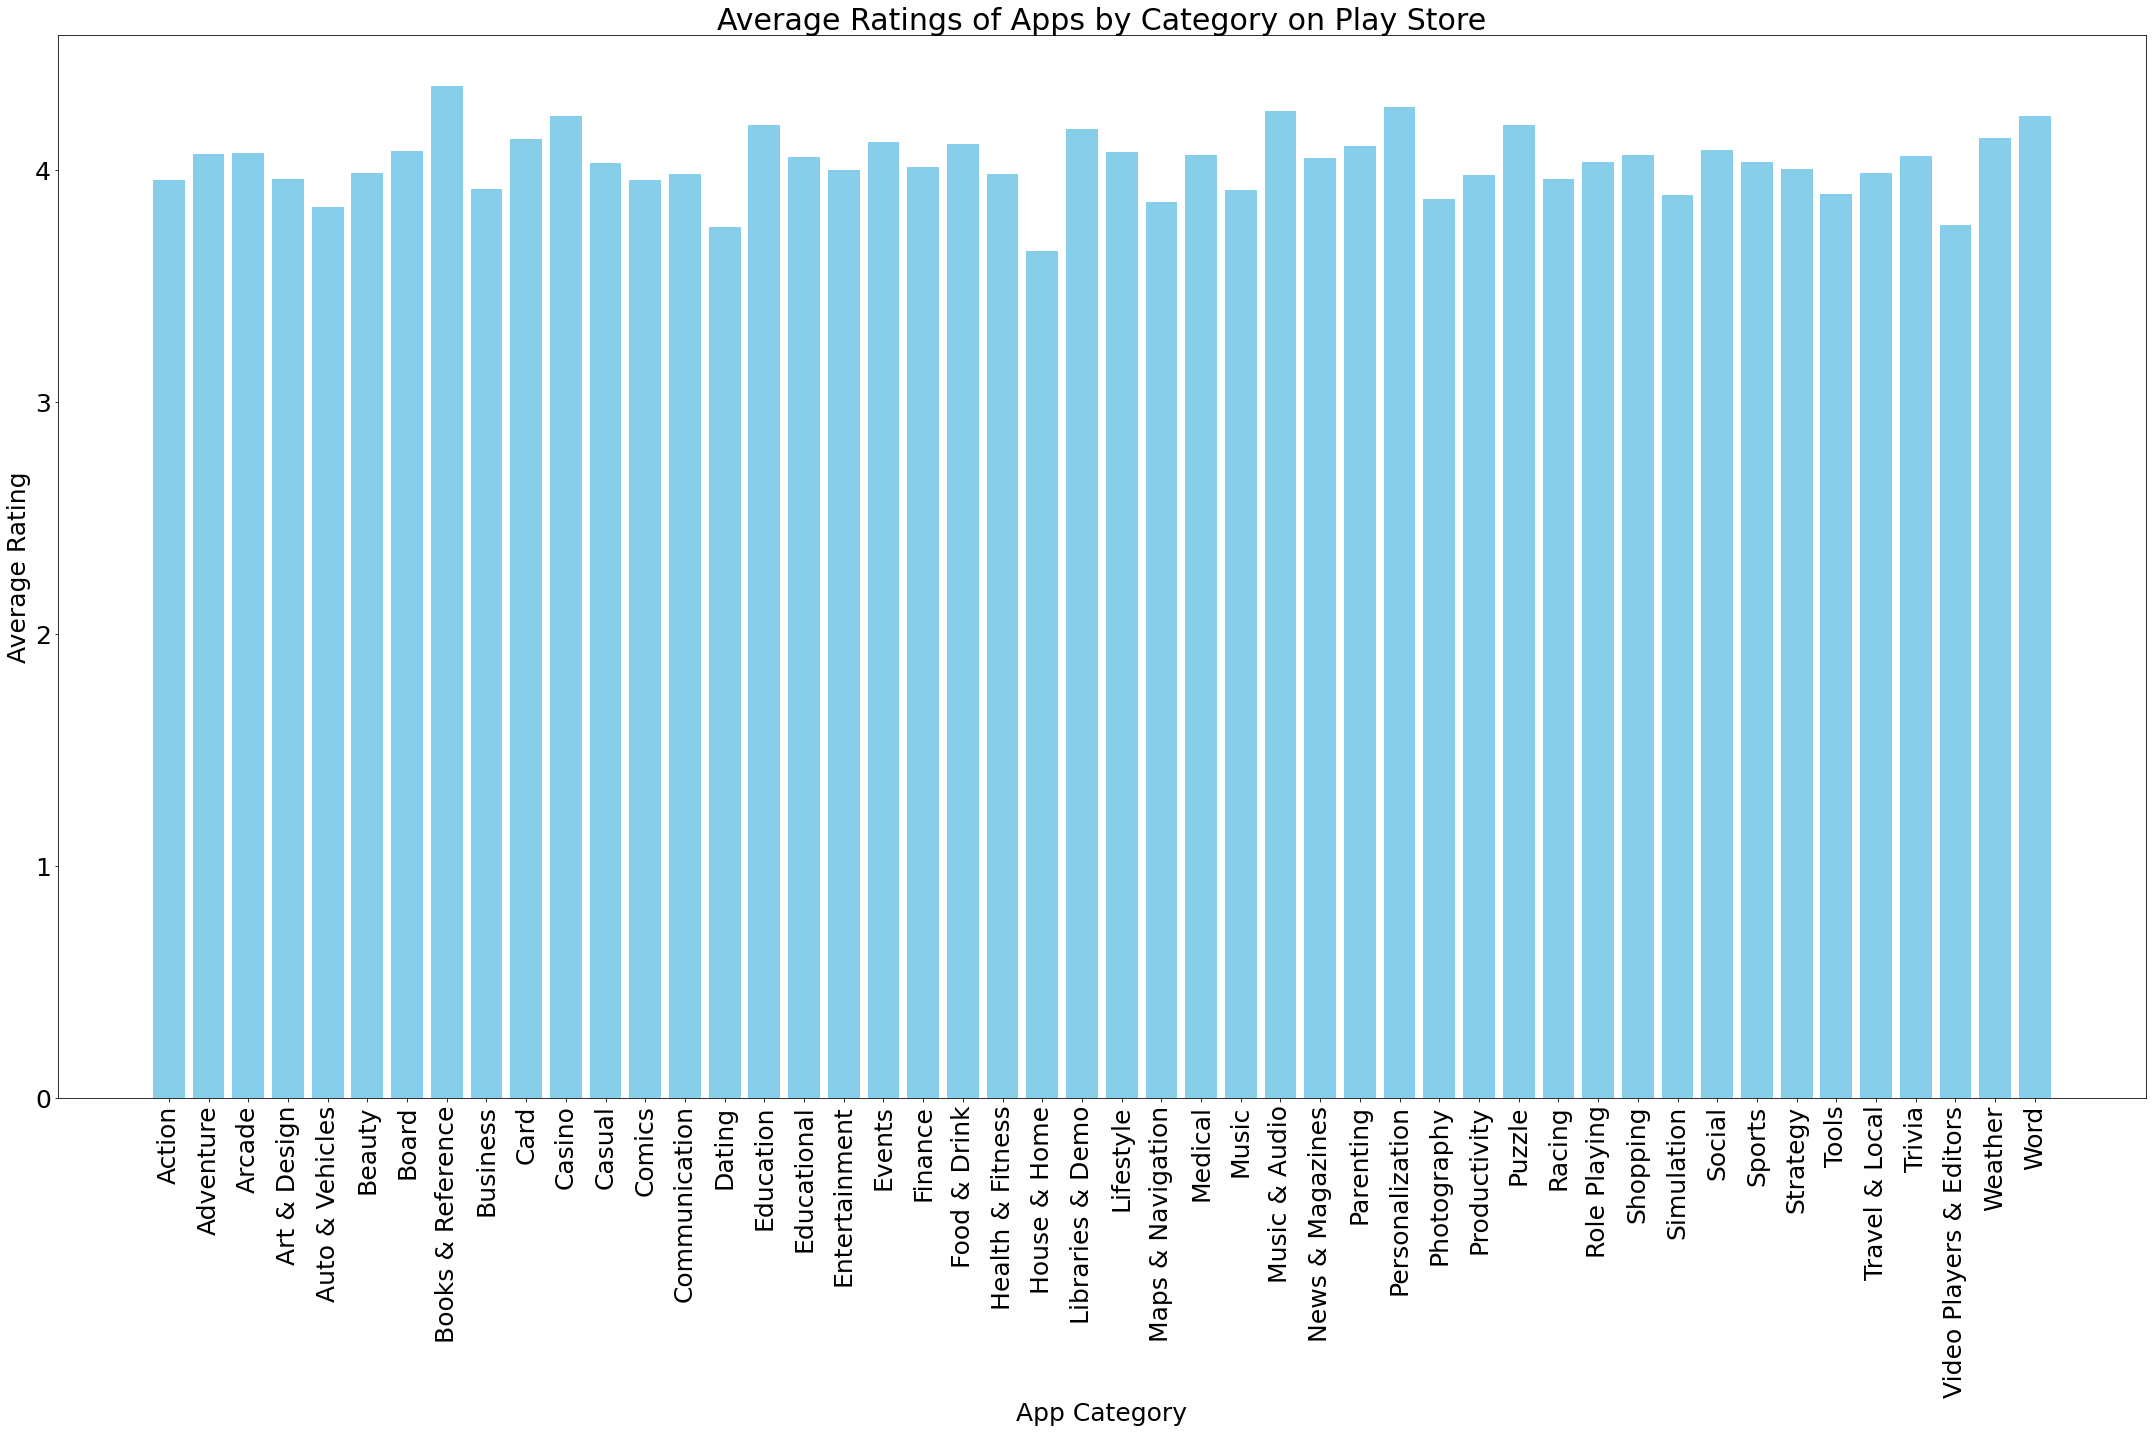

In [35]:
grouped_category=df.groupby("Category")
cat_rate=grouped_category["Rating"].mean()
plt.figure(figsize=(30, 20))
#plt.bar(cat_rate.index, cat_rate.values, color='skyblue')
plt.bar([str(category) for category in cat_rate.index], cat_rate.values, color='skyblue')
plt.xlabel('App Category',fontsize=25)
plt.ylabel('Average Rating',fontsize=25)
plt.title('Average Ratings of Apps by Category on Play Store',fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=25) 
plt.yticks(fontsize=25) 
plt.tight_layout()
plt.show()

***Inference :***

from above graph we conclude **Category Variability** The plot shows the variability in average ratings across different app categories. Each bar represents a specific category, and the height of the bar represents the average rating within that category.

we can easily **compare the average ratings of different categories** by looking at the differences in bar heights.

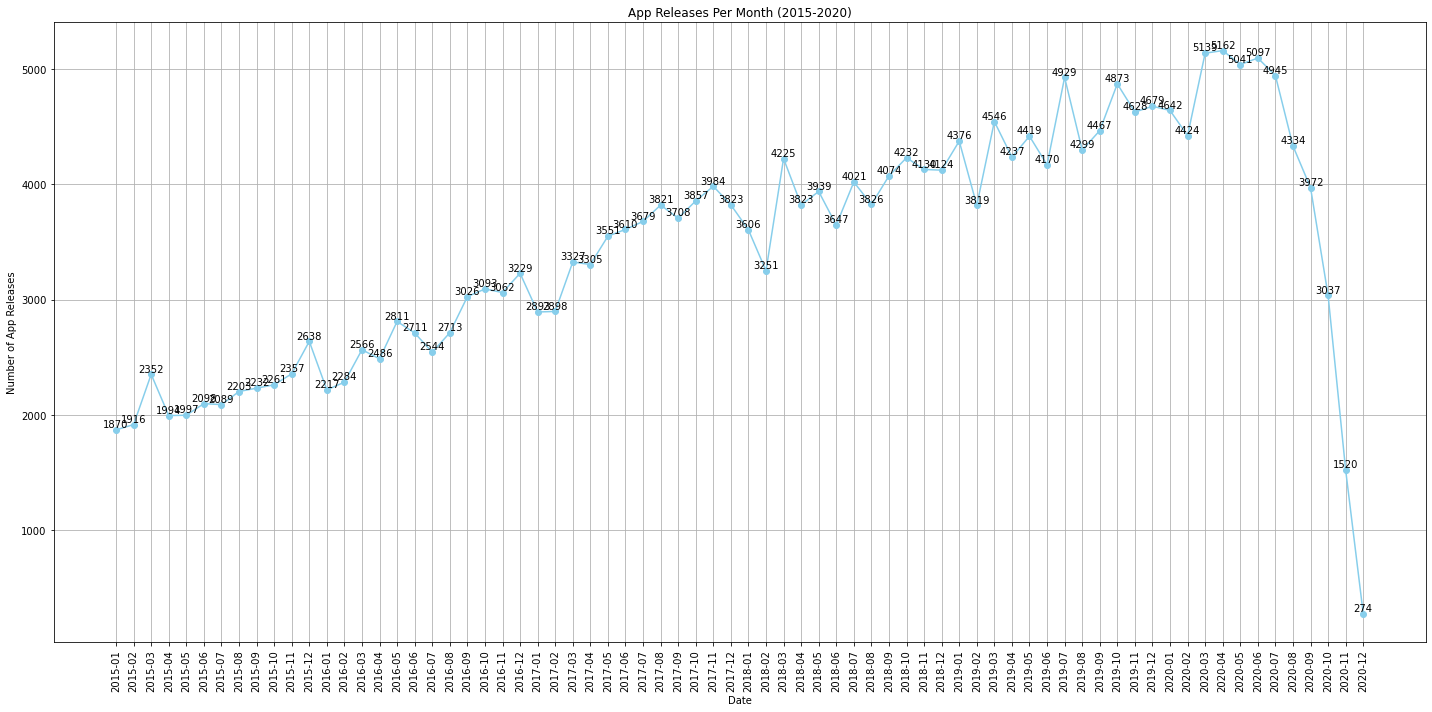

In [36]:
release_dates = df['Released']
data_years = df[(release_dates.dt.year >= 2015) & (release_dates.dt.year <= 2020)]
apps_per_month = data_years['Released'].dt.to_period('M').value_counts().sort_index()

periods = [str(period) for period in apps_per_month.index]
plt.figure(figsize=(20,10))
plt.plot(periods, apps_per_month.values, marker='o', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of App Releases')
plt.title('App Releases Per Month (2015-2020)')
plt.xticks(rotation=90)
plt.grid()
for period, count in apps_per_month.items():
    plt.text(str(period), count + 5, str(count), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

***Inference :***

In this graph annoted values give us **number of apps released in that specific Year/month.**
This graph allows us to see **how app releases are distributed over time.**
We also get **Monthly Trends** i.e. we can see if there are certain months that consistently have higher or lower numbers of app releases.we can observe that in 2020-12 there is huge drop in app releases 

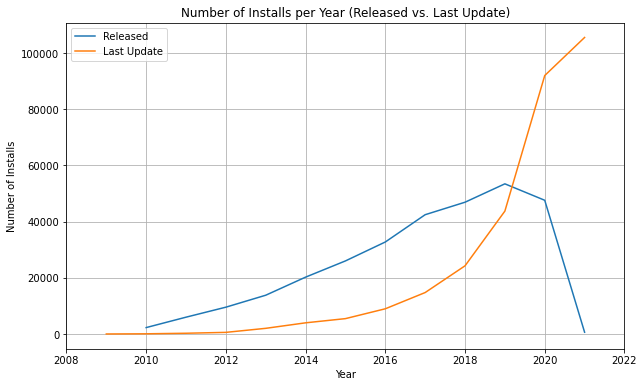

In [37]:
df['Released_Year'] = df['Released'].dt.year
df['Last_Update_Year'] = df['Last_update'].dt.year
 

installs_per_year_released = df.groupby('Released_Year').size()


installs_per_year_last_update = df.groupby('Last_Update_Year').size()


installs_per_year = pd.concat([installs_per_year_released, installs_per_year_last_update], axis=1)
installs_per_year.columns = ['Installs_based_on_Released', 'Installs_based_on_Last_Update']

plt.figure(figsize=(10, 6))
plt.plot(installs_per_year.index, installs_per_year['Installs_based_on_Released'], label='Released')
plt.plot(installs_per_year.index, installs_per_year['Installs_based_on_Last_Update'], label='Last Update')
plt.xlim(2008,2022)
plt.xlabel('Year')
plt.ylabel('Number of Installs')
plt.title('Number of Installs per Year (Released vs. Last Update)')
plt.legend()
plt.grid()

plt.show()

***Inference :***
    
from above graph we got **Overall Growth** From 2008 to 2022, there has been a noticeable increase in the number of installs, as shown by the upward trend in both lines representing "Installs based on Released" and "Installs based on Last Update."

we also get information about **peak years** There appear to be some peak years where the number of installs based on both release and last update is particularly high. These peak years may correspond to significant updates, marketing efforts, or other factors that attracted more users.

# Statistics

In [38]:
df.describe()

,Rating,Rating_Count,Minimum_Installs,Price,Reviews,Released_Year,Last_Update_Year
count,301578.000000,3.015780e+05,3.015780e+05,301578.000000,3.015780e+05,301578.000000,301578.000000
mean,4.077717,1.823757e+04,1.120639e+06,0.258643,6.584365e+03,2016.996382,2019.537095
std,0.605524,5.402763e+05,3.746105e+07,3.005920,2.001565e+05,2.445636,1.727558
min,1.000000,3.000000e+00,0.000000e+00,0.000000,0.000000e+00,2010.000000,2009.000000
25%,3.799513,2.600000e+01,1.000000e+03,0.000000,1.100000e+01,2015.000000,2019.000000
50%,4.200000,1.320000e+02,1.000000e+04,0.000000,5.700000e+01,2017.000000,2020.000000
75%,4.500000,1.071000e+03,1.000000e+05,0.000000,4.230000e+02,2019.000000,2021.000000
max,5.000000,1.386210e+08,1.000000e+10,399.990000,5.237720e+07,2021.000000,2021.000000


##### Mean is  The arithmetic average of the data.

Average of the rating of apps  is 3.018

Average of minimum installs is 883548

Average of price of paid apps  is 0.31(in USD)

50% apps are having rating 3.933 

50% apps having minimum installs 500000

75% apps are free

In [39]:
numeric_columns = df.select_dtypes(include=[float, int]).columns
df[numeric_columns].skew()

Rating               -1.248563
Rating_Count        158.583545
Minimum_Installs    145.597365
Price                74.218403
Reviews             160.221090
Released_Year        -0.706276
Last_Update_Year     -1.673093
dtype: float64

1. **Skewness of Rating (-1.248563):**

   A negative skewness value indicates that the distribution of the 'Rating' feature is skewed to the left (i.e., the tail is on the left side). This suggests that there might be a concentration of higher ratings on the right side of the distribution.
   


2. **Skewness of Rating_Count (158.566012):**

   A skewness value far from zero indicates a high degree of skewness. Positive skewness of this magnitude suggests that the 'Rating_Count' distribution is heavily skewed to the right, meaning that there might be a relatively small number of apps with extremely high rating counts, causing the tail of the distribution to be elongated to the right.
   




3. **Skewness of Minimum_Installs (145.051347):**

   Similar to 'Rating_Count', a high positive skewness value for 'Minimum_Installs' indicates that the distribution of the number of minimum installs is skewed to the right. This could mean that there are a few apps with a significantly higher number of installs compared to the majority.





4. **Skewness of Price (74.079187):**

   A positive skewness value for 'Price' suggests that the distribution of prices is skewed to the right, indicating that there might be a few apps with high prices compared to the rest.


# Hypothesis Testing

**Further we have used statistics to do hypothesis testing for getting an inference**

#### Selecting random data of more than 30 records from the data

In [40]:
sample_data=df.sample(40)
sample_data

,App_Name,App_Id,Category,Rating,Rating_Count,Minimum_Installs,Free,Price,Currency,Released,Last_update,Content_Rating,In_app_purchases,Editor_Choice,Reviews,Developer,Released_Year,Last_Update_Year
397072,ELLE Magazine UK,uk.co.hearst.elleuk,Lifestyle,3.272727,11,10000.0,True,0.00,USD,2016-12-02,2020-07-14,Everyone,True,False,3.0,Hearst Magazines UK,2016,2020
41630,Ludo Ludo,com.Star.Ludo,Board,4.150000,119,50000.0,True,0.00,USD,2019-02-04,2020-06-30,Everyone,False,False,33.0,Wabou Studio,2019,2020
177340,Navy App Locker,mil.navy.navyapplocker,Business,2.200000,45,10000.0,True,0.00,USD,2017-03-15,2019-06-10,Everyone,False,False,24.0,SeaWarrior Applications,2017,2019
272765,PAW Patrol: Air & Sea,net.pluginmedia.pawpatrolflyer,Educational,3.698039,2553,100000.0,False,3.99,USD,2016-03-30,2018-07-03,Everyone,True,False,1315.0,Nickelodeon,2016,2018
170785,Eurovision - rtve.es,es.rtve.eurovision,Music & Audio,2.772277,168,10000.0,True,0.00,USD,2017-01-10,2021-02-11,Everyone,False,False,75.0,RTVE Medios Interactivos,2017,2021
373668,iPhone 13 Pro Max Launcher / iPhone 13 Wallpapers,ittech.iphone.iphone12.iphone12theme.theme.wal...,Personalization,4.272728,33,5000.0,True,0.00,USD,2019-11-23,2021-01-29,Everyone,False,False,17.0,IT-Tech Solutions,2019,2021
48806,SUNKEN ROOM -room escape game-,info.mygames888.sunkenroom,Puzzle,4.370000,955,100000.0,True,0.00,USD,2013-09-27,2020-10-09,Everyone,False,False,229.0,noprops,2013,2020
163626,BATPLA - Battle for the Planet,jp.whrp.pbattle,Role Playing,4.403670,1080,10000.0,True,0.00,USD,2018-01-12,2018-06-25,Everyone,True,False,235.0,株式会社 WHRP,2018,2018
292655,uVocab - Vocabulary Trainer,com.zenapps.zenvocabbuilderfree,Education,4.391850,3184,100000.0,True,0.00,USD,2011-04-13,2014-10-24,Everyone 10+,False,False,844.0,Zendroid,2011,2014
103448,White 3D Galaxy Keyboard Theme,com.ikeyboard.theme.white_3d.galaxy,Personalization,4.638656,1193,100000.0,True,0.00,USD,2019-06-10,2020-10-13,Everyone,False,False,670.0,New keyboard Theme for Android 2021,2019,2020


# Ztest for one sample
## check if avg minimum installs of sample data is same as avg minimum installs of populattion data
**Null Hypotheis**

The avg minimum installs of sample data is same as avg minimum installs of populattion data

**Alternate Hypothesis**

The avg minimum installs of sample data is not same as avg minimum installs of populattion data¶

In [41]:
pop_installs=df["Minimum_Installs"].mean()
sample_installs=sample_data["Minimum_Installs"].mean()
z_stat,p_val=weightstats.ztest(sample_data["Minimum_Installs"],value=pop_installs)
if p_val<0.05:
    print("Reject The Null Hypothesis")
    print("The avg minimum installs of sample data is not same as avg minimum installs of populattion data")
else:
    print("Accept The Null Hypothesis")
    print("The avg minimum installs of sample data is same as avg minimum installs of populattion data")

Reject The Null Hypothesis
The avg minimum installs of sample data is not same as avg minimum installs of populattion data


###### INFERENCE : From above test we conclude that The average of Min. installs of sample  and  average of Min. installs of Population is  not equal

# one sample proportion test

### Check if Average Proportion of positive reviews for the app is equal to expected proportion.

**NULL HYPOTHEISIS**

The proportion of positive reviews for the app is equal to the expected proportion.

**ALTERNATE HYPOTHEISIS**

The proportion of positive reviews for the app is not equal to the expected proportion.

In [42]:
ratings=df.Rating.to_list()
positive_threshold = 4
positive = sum(rating > positive_threshold for rating in ratings)
total_reviews=df.Reviews.count()
positive_reviews=positive
expected_proportion=positive_reviews/total_reviews

p_value = stats.binom_test(positive_reviews, n=total_reviews, p=expected_proportion)

if p_value<0.05:
    print("Reject Null Hypo")
    print("The proportion of positive reviews for the app is not equal to the expected proportion.")
else:
    print("Accept Null Hypo")
    print("The proportion of positive reviews for the app is not equal to the expected proportion.")

Accept Null Hypo
The proportion of positive reviews for the app is not equal to the expected proportion.


###### INFERENCE : From above test we conclude that The Proportion of positive reviews for the app is not equal to expected proportion

# Two sample paired t test

### Check whether There is no significant difference between the measurements before and after an  event or time period.

**NULL HYPOTHESIS**

There is no significant difference between the measurements before and after the event or time period.

**ALTERNATE HYPOTHESIS**

There is a significant difference between the measurements before and after the event or time period.

In [43]:
release_dates = df["Released"]
data_years = df[(release_dates.dt.year >= 2015) & (release_dates.dt.year <= 2020)]
app_releases_per_year = data_years["Released"].dt.year.value_counts().sort_index()
for year, count in app_releases_per_year.items():
    print(f"Year: {year}, Number of App Releases: {count}")


Year: 2015, Number of App Releases: 26007
Year: 2016, Number of App Releases: 32742
Year: 2017, Number of App Releases: 42456
Year: 2018, Number of App Releases: 46898
Year: 2019, Number of App Releases: 53442
Year: 2020, Number of App Releases: 47587


In [44]:
data = [
    (datetime(2015, 1, 1), 31478),
    (datetime(2016, 1, 1), 42168),
    (datetime(2017, 1, 1), 56638),
    (datetime(2018, 1, 1), 67149),
    (datetime(2019, 1, 1), 84679),
    (datetime(2020, 1, 1), 92041)
]

threshold_year = 2018

group1_before = [measurement for date, measurement in data if date.year < threshold_year]
group2_after = [measurement for date, measurement in data if date.year >= threshold_year]
test_statistic, p_value = stats.ttest_rel(group1_before, group2_after)

if p_value < 0.05:
    print("Reject NUll Hypo")
    print("There is a significant difference between the measurements before and after the event or time period.")
else:
    print("Accept Null Hypo")
    print("There is no significant difference between the measurements before and after the event or time period.")

Reject NUll Hypo
There is a significant difference between the measurements before and after the event or time period.


##### INFERENCE : From above test we conclude that There is a significant difference between the measurements before and after an event or specific time period.

# Two Proportion T-test


### Check whether Probabilities of two samples are same or not

**Null Hypotheis(H0) :**
    
Probability of sample1 and sample 2 is same

**Alternate Hypotheis(H1) :**
    
Probability of sample1 and sample 2 is not same


In [45]:
value=proportion.test_proportions_2indep(949,1000,9381,10000) #here we give two values 30 out of 200 and 10 out of 100

In [46]:
value

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1.3617372547894708
pvalue = 0.17328081955142505
compare = diff
method = agresti-caffo
diff = 0.01089999999999991
ratio = 1.0116192303592366
odds_ratio = 1.2278280462595421
variance = 5.491813295139932e-05
alternative = two-sided
value = 0
tuple = (1.3617372547894708, 0.17328081955142505)

In [47]:
if value[1]<0.05:
    print("Reject NULL HYPOTHESIS")
else:
    print('Accept NULL HYPOTHESIS')

Accept NULL HYPOTHESIS


##### INFERENCE : From above inference we Conclude that Probability of sample 1 and sample 2 is same

# Anova test

### Check if There is a significant difference between avg rating of the categories.

**NULL HYPOTHESIS**

There is no significant difference between avg rating of the categories.

**ALTERNATE HYPOTHESIS**

There is significant difference between avg rating of the categories."

In [48]:
category_groups = [df['Rating'][df['Category'] == category] for category in df['Category'].unique()]
f_statistic, p_value = f_oneway(*category_groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference between avg rating of the categories.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference between avg rating of the categories.")


F-statistic: 407.8412962546487
P-value: 0.0
Reject the null hypothesis.
There is a significant difference between avg rating of the categories.


##### From above test we conclude that There is a significant difference between avg rating of the categories.


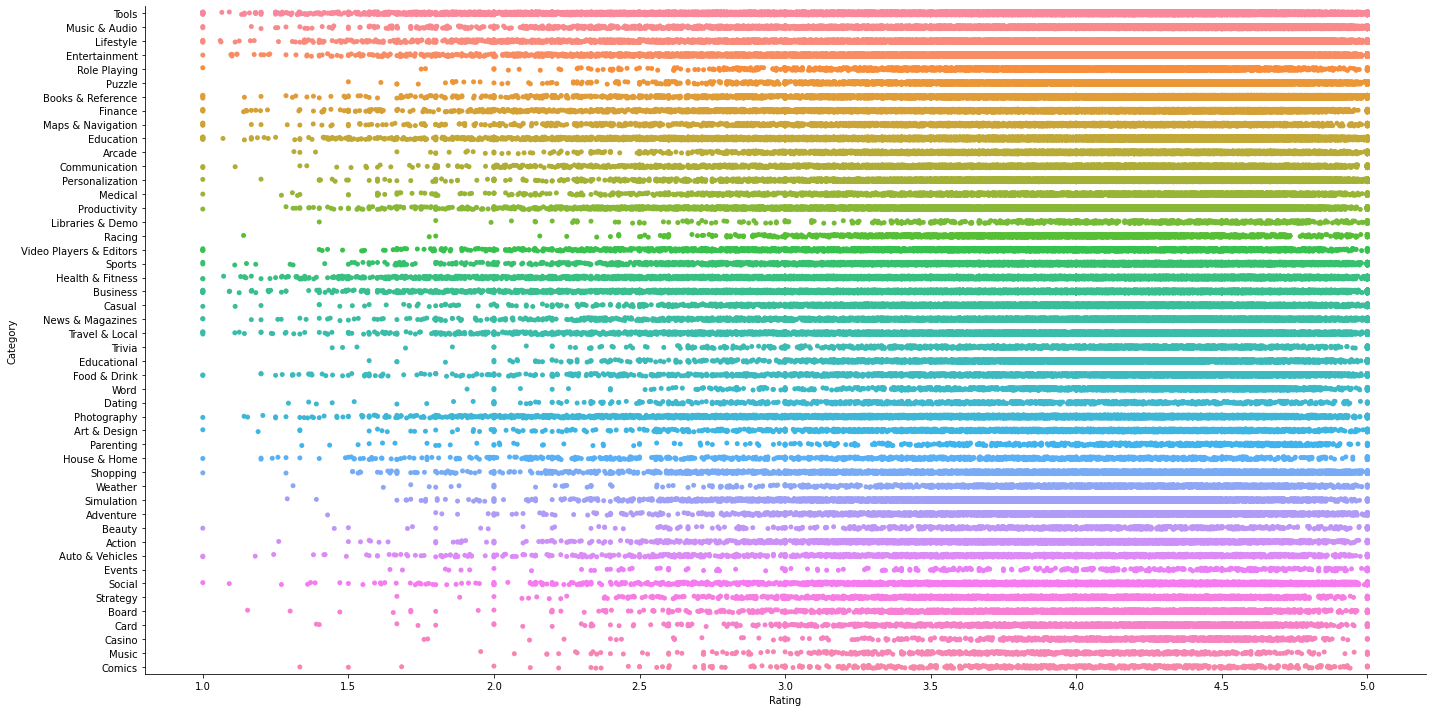

In [49]:
sns.catplot(data=df,x="Rating",y="Category",height=10,aspect=2,)

# pairwise tukeyhsd test

In [50]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = sm.formula.ols('Rating ~ Category', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=df['Rating'], groups=df['Category'], alpha=0.05)

# Print ANOVA results
print("ANOVA results:")
print(anova_table)

# Print Tukey's HSD results
print("\nTukey's HSD results:")

ANOVA results:
                 sum_sq        df           F  PR(>F)
Category    6609.262879      47.0  407.841296     0.0
Residual  103966.756983  301530.0         NaN     NaN

Tukey's HSD results:


In [51]:
print(tukey_results)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
                 Action               Adventure   0.1093  0.001  0.0612  0.1573   True
                 Action                  Arcade   0.1148  0.001  0.0705  0.1592   True
                 Action            Art & Design    0.004    0.9 -0.0559  0.0639  False
                 Action         Auto & Vehicles  -0.1203  0.001 -0.1847 -0.0558   True
                 Action                  Beauty   0.0266    0.9 -0.0602  0.1135  False
                 Action                   Board   0.1223  0.001  0.0656  0.1791   True
                 Action       Books & Reference   0.4036  0.001  0.3675  0.4398   True
                 Action                Business  -0.0401 0.0711 -0.0811   0.001  False
                 Action                    

# Applying Machine Learning Algorithms For prediction

# Regression Model

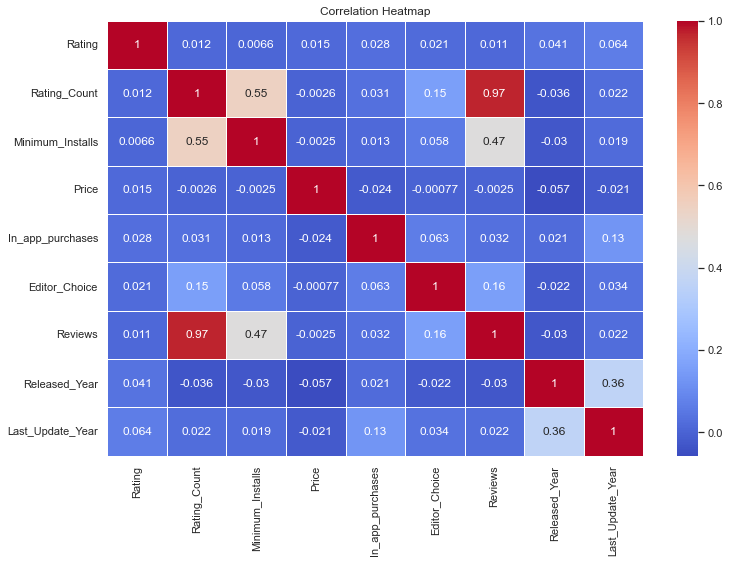

In [52]:
sns.set(style="white")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [53]:
df_train=df[["Minimum_Installs","Free","Reviews","Rating"]]

In [54]:
encoder = LabelEncoder()
df_train["Free"] = encoder.fit_transform( df_train["Free"])

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'False' is labeled as 0
Class 'True' is labeled as 1


In [55]:
df_train.corr()

,Minimum_Installs,Free,Reviews,Rating
Minimum_Installs,1.000000,0.007241,0.471530,0.006645
Free,0.007241,1.000000,0.007165,-0.049197
Reviews,0.471530,0.007165,1.000000,0.011493
Rating,0.006645,-0.049197,0.011493,1.000000


# Linear Regression

In [56]:
df2=df_train.sample(100000)

In [57]:
x=df2[["Minimum_Installs","Free","Reviews",]]
y=df2["Rating"]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2=r2_score(y_test,y_pred)
print('r2 value is',r2)

# SVR

In [59]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [60]:
# Create an SVR model
svr_model = SVR(kernel='linear') 
#y_train = y_train.ravel()

In [ ]:
# Fit the SVR model to the training data
svr_model.fit(x_train, y_train)

# Make predictions using the SVR model
y_pred_svr = svr_model.predict(x_test)

# Calculate the mean squared error for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error (SVR):", mse_svr)

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(x_train, y_train)

# Make predictions using the Decision Tree Regression model
y_pred_dt = dt_model.predict(x_test)

# Calculate the mean squared error for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_dt

0.39390903936036575

# RandomForest

In [62]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regression model
rf_model = RandomForestRegressor()

y_train = y_train.ravel()

# Fit the model to the training data
rf_model.fit(x_train, y_train)


# Make predictions using the Random Forest Regression model
y_pred_rf = rf_model.predict(x_test)

# Calculate the mean squared error for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)

Mean Squared Error (Random Forest Regression): 0.3722824421897991


# KNN

In [63]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Fit the model to the training data
knn_model.fit(x_train, y_train)

# Make predictions using the KNN Regression model
y_pred_knn = knn_model.predict(x_test)

# Calculate the mean squared error for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error (KNN Regression):", mse_knn)

Mean Squared Error (KNN Regression): 0.40336008160765907


# Classification Model

In [64]:
df_train=df[["Category","Rating","Minimum_Installs","Reviews","Free"]]

In [65]:
df3=df_train.sample(200000)

In [66]:
encoder = LabelEncoder()

df3["Free"] = encoder.fit_transform( df3["Free"])

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'False' is labeled as 0
Class 'True' is labeled as 1


In [67]:
encoder = LabelEncoder()

df3["Category"]= encoder.fit_transform( df3["Category"])

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'Action' is labeled as 0
Class 'Adventure' is labeled as 1
Class 'Arcade' is labeled as 2
Class 'Art & Design' is labeled as 3
Class 'Auto & Vehicles' is labeled as 4
Class 'Beauty' is labeled as 5
Class 'Board' is labeled as 6
Class 'Books & Reference' is labeled as 7
Class 'Business' is labeled as 8
Class 'Card' is labeled as 9
Class 'Casino' is labeled as 10
Class 'Casual' is labeled as 11
Class 'Comics' is labeled as 12
Class 'Communication' is labeled as 13
Class 'Dating' is labeled as 14
Class 'Education' is labeled as 15
Class 'Educational' is labeled as 16
Class 'Entertainment' is labeled as 17
Class 'Events' is labeled as 18
Class 'Finance' is labeled as 19
Class 'Food & Drink' is labeled as 20
Class 'Health & Fitness' is labeled as 21
Class 'House & Home' is labeled as 22
Class 'Libraries & Demo' is labeled as 23
Class 'Lifestyle' is labeled as 24
Class 'Maps & Navigation' is labeled as 25
Class 'Medical' is labeled as 26
Class 'Music' is labeled as 27
Class 'Music & Au

In [68]:
df3.head()

,Category,Rating,Minimum_Installs,Reviews,Free
276947,15,4.57,10000.0,61.0,1
215723,41,4.30,50000.0,166.0,1
48114,34,3.84,50000.0,58.0,1
3088,15,4.00,1000.0,5.0,1
177152,39,4.65,10000.0,251.0,1


In [69]:
X=df3[["Category","Rating","Minimum_Installs","Reviews"]]
y=df3["Free"]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [71]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
clf = LogisticRegression()

# Train the model
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_lr = clf.predict(x_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", class_report_lr)


Accuracy: 0.94225
Confusion Matrix:
 [[    0  2310]
 [    0 37690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2310
           1       0.94      1.00      0.97     37690

    accuracy                           0.94     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.89      0.94      0.91     40000



In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(x_train, y_train)

# Make predictions using the Decision Tree Regression model
y_pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Calculate the mean squared error for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

Accuracy: 0.92855
Confusion Matrix:
 [[  945  1365]
 [ 1493 36197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.41      0.40      2310
           1       0.96      0.96      0.96     37690

    accuracy                           0.93     40000
   macro avg       0.68      0.68      0.68     40000
weighted avg       0.93      0.93      0.93     40000



In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = clf.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.948125
Confusion Matrix:
 [[  855  1455]
 [  620 37070]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.37      0.45      2310
           1       0.96      0.98      0.97     37690

    accuracy                           0.95     40000
   macro avg       0.77      0.68      0.71     40000
weighted avg       0.94      0.95      0.94     40000



In [76]:
from  sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Fit the model to the training data
knn_model.fit(x_train, y_train)

# Make predictions using the KNN Regression model
y_pred_knn = knn_model.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Calculate the mean squared error for KNN Regression
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", conf_matrix_knn)
print("Classification Report:\n", class_report_knn)

Accuracy: 0.939725
Confusion Matrix:
 [[  154  2156]
 [  255 37435]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.07      0.11      2310
           1       0.95      0.99      0.97     37690

    accuracy                           0.94     40000
   macro avg       0.66      0.53      0.54     40000
weighted avg       0.91      0.94      0.92     40000



In [85]:
print("Testing Performances for Machine Learning Algorithms")
result = pd.DataFrame({"Algorithms":['Logistic Regression', "Decision Tree","Random Forest" , "KNN"],
                       "Accuracy":[0.943075,0.92705,0.943075, 0.94175],
                       "Precision":[0.94,0.96,0.96,0.95],
                       "Recall":[1.00,0.96,0.98,0.99],
                       "F1 Score":[0.97,0.96,0.97,0.97]}).set_index('Algorithms')
result

Testing Performances for Machine Learning Algorithms


,Accuracy,Precision,Recall,F1 Score
Algorithms,,,,
Logistic Regression,0.943075,0.94,1.00,0.97
Decision Tree,0.927050,0.96,0.96,0.96
Random Forest,0.943075,0.96,0.98,0.97
KNN,0.941750,0.95,0.99,0.97
